In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from htrc_features import FeatureReader
from htrc_features.feature_reader import group_tokenlist
from htrc_features.utils import id_to_rsync
from compare_tools.utils import EFComparison, Comparison, HTID
import pandas as pd
import numpy as np
import time
import uuid
import utils

In [18]:
rsync_root = '/data/extracted-features/'
meta_path = "../../sampling/test_dataset.csv.gz"

This notebooks demonstrates page-level Jaccard similarity. This an expensive procedure, but useful as a ground truth.

The algorithms for extracting runs operate on the Jaccard similarity matrix for pages the same way they do on GloVe or SRP
matrices for chunked books.

In [19]:
filenames = pd.read_csv(meta_path, low_memory = False)

Some test code to explore vol and page methods. Can be cut.

In [20]:
ids = ["mdp.49015002670504", "inu.30000042783195"]

In [21]:
HTID(ids[0], rsync_root=rsync_root)

In [22]:
left, right = [HTID(id, rsync_root='/data/extracted-features/') for id in ids]

In [23]:
left

In [24]:
right

In [25]:
comp = EFComparison(left, right)

Using HTID class


In [26]:
comp.jaccard_matrix
comp.similarity_matrix

array([[0.05882353, 0.05      , 0.        , ..., 0.03108808, 0.0210084 ,
        0.        ],
       [0.05      , 0.02702703, 0.        , ..., 0.01036269, 0.00843882,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07555556, 0.05535055,
        0.        ],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

I find 0.2 to be a reasonable threshold for Jaccard similarity. As you see here, there are many page-comparison pairs that reach 0.2 similarity (maybe largely short pages?) but the main run of similarity is successfully extracted.

In [27]:
comp.assemble_sw_runs(threshold=.2)

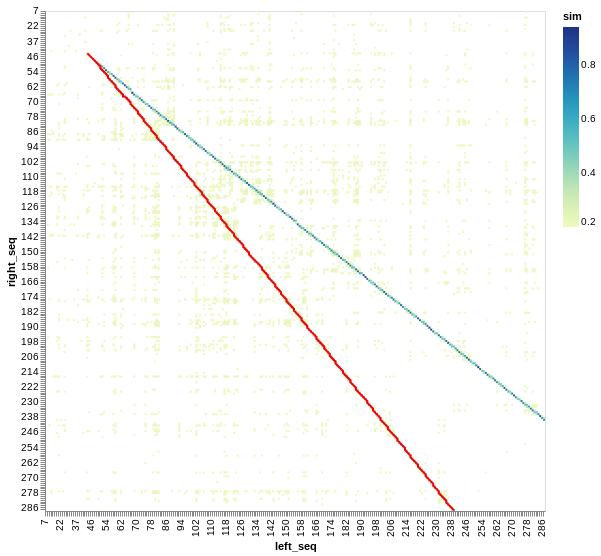

In [28]:
comp.plot("jaccard_matrix", filter = lambda x: x >= .2, runs = True).properties(width=500, height=500)